In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

wine = load_wine()
X = wine.data
y = wine.target

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

k_values = [2, 3, 4]
clusters = {}
silhouette_scores = []

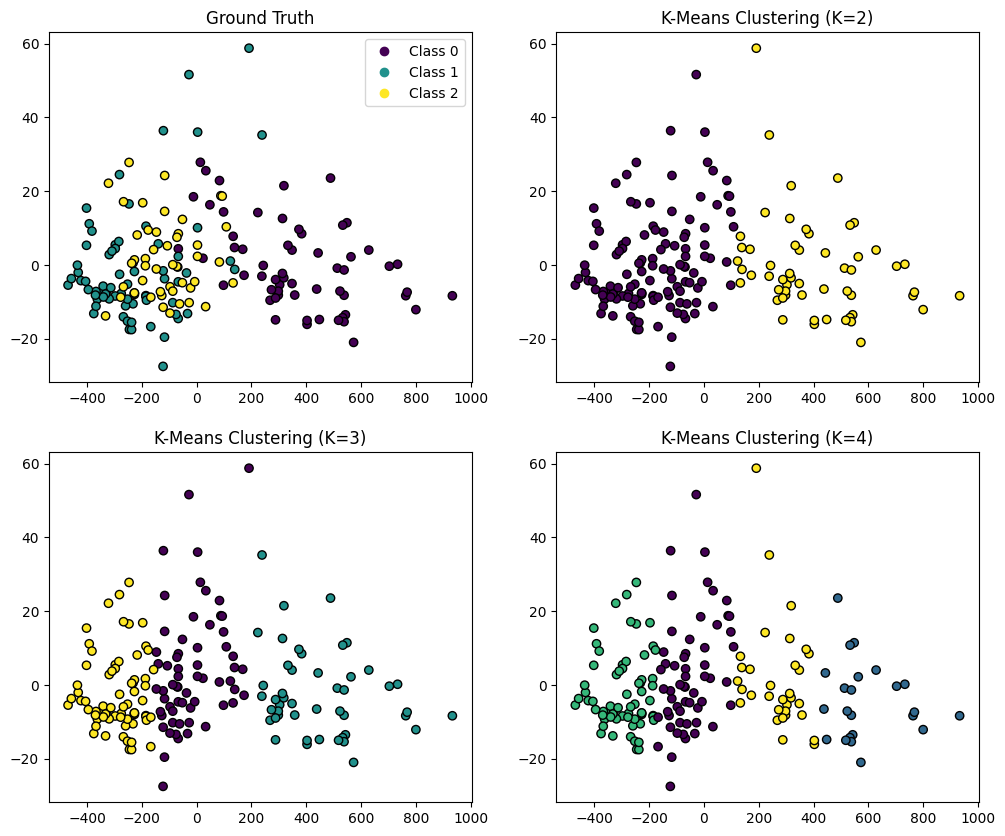

In [11]:
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_pca)
    clusters[k] = labels
    silhouette_scores.append(silhouette_score(X_pca, labels))

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

scatter = axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k')
axes[0].set_title("Ground Truth")
axes[0].legend(handles=scatter.legend_elements()[0], labels=['Class 0', 'Class 1', 'Class 2'])

for i, k in enumerate(k_values):
    scatter = axes[i+1].scatter(X_pca[:, 0], X_pca[:, 1], c=clusters[k], cmap='viridis', edgecolor='k')
    axes[i+1].set_title(f"K-Means Clustering (K={k})")

<Figure size 640x480 with 0 Axes>

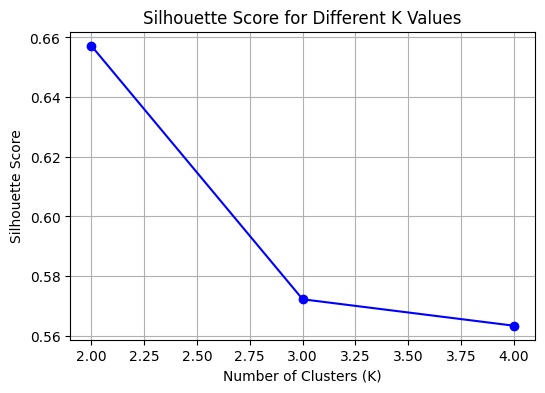

In [12]:
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 4))
plt.plot(k_values, silhouette_scores, marker='o', linestyle='-', color='b')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for Different K Values")
plt.grid(True)
plt.show()